<a href="https://colab.research.google.com/github/iranurpalah/Project/blob/main/Predicting_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv ('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


Task 1 : Clean Up the Data
-Are they any missing values?
-Standardize categories in region
-Standardize charges data type (float)

In [ ]:
insurance = df
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [ ]:
missing_data = insurance.isnull().shape


**CLEANING DATA**

In [ ]:
# -Are they any missing values?
insurance_filled = insurance.dropna() #menghapus baris yang memiliki setidaknya satu nilai NaN.

#-Standardize categories in region
insurance_filled ['region'] = insurance_filled ['region'].str.lower() #mengubah huruf menjadi huruf kecil
insurance_filled ['region'].unique() #daftar semua nilai unik yang ada di kolom region

#Standardize sex to just two categories
FEMALE = 'female'
MALE = 'male'
sex_map = {'F' : FEMALE, 'woman' : FEMALE, 'man' : MALE, 'M' : MALE}
insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)
insurance_filled['sex'].unique()

#Change Smooker Column to Boolean
insurance_filled['smoker'] = (insurance_filled['smoker']=='yes') #nilai True menunjukkan bahwa individu tersebut adalah perokok (nilai dalam kolom adalah 'yes'), dan False menunjukkan bahwa individu tersebut bukan perokok (nilai selain 'yes')
insurance_filled.head()

#-Standardize charges data type (float)
insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype('float64') #Fungsi strip() menghilangkan karakter yang ditentukan dari awal dan akhir string. Dalam hal ini, karakter yang dihapus adalah $

#Changed all Values to Positive
import numpy as np
insurance_pos = insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)
insurance_pos.sample(20)

<ipython-input-7-6aada5d36771>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled ['region'] = insurance_filled ['region'].str.lower() #mengubah huruf menjadi huruf kecil
<ipython-input-7-6aada5d36771>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)
<ipython-input-7-6aada5d36771>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,age,sex,bmi,children,smoker,region,charges
347,46.0,male,33.345,1.0,False,northeast,8334.45755
1268,20.0,female,33.300,0.0,False,southwest,1880.48700
1083,32.0,male,31.500,1.0,False,southwest,4076.49700
1063,36.0,male,28.595,3.0,False,northwest,6548.19505
1109,45.0,male,20.350,3.0,False,southeast,8605.36150
1040,35.0,female,28.025,0.0,True,northwest,20234.85475
1013,48.0,male,32.300,1.0,False,northwest,8765.24900
940,18.0,male,23.210,0.0,False,southeast,1121.87390
1304,42.0,male,24.605,2.0,True,northeast,21259.37795
876,49.0,female,27.100,1.0,False,southwest,26140.36030


**VISUALIZATION**

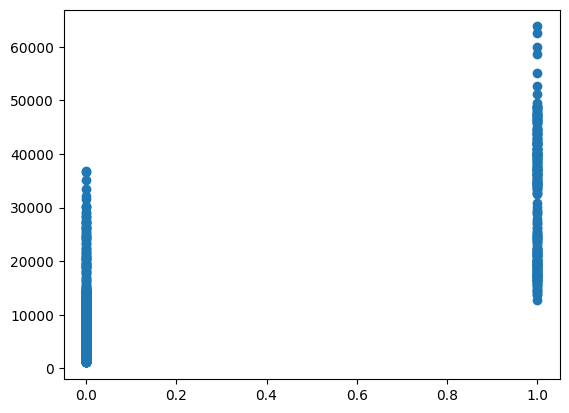

In [ ]:
#Task 2 Scatterplots of Relationship Between Variables & Charges

import matplotlib.pyplot as plt

df = insurance_pos.copy()
plt.scatter(df['smoker'], df['charges'])

In [ ]:
#Task 3 - Prepare The Data for a Model Fitting

df_new = pd.get_dummies(df, prefix = ['region'], columns = ['region'], dtype=int)
df_new = df_new.drop(columns=['region_southeast'])

#df['region'].value_counts() = mengetahui jumlah di setiap region

df_new['smoker'] = df_new['smoker'].astype('int64')
df_new['is_male'] = (df_new['sex']=='male').astype('int64')# 1= laki-laki, 0=perempuan
df_new = df_new.drop(columns=['sex'])

df_new = df_new.dropna() #menghapus baris atau kolom yang memiliki nilai NaN (nilai kosong).
df_new.head()



,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,0,0,1,0
1,18.0,33.770,1.0,0,1725.55230,0,0,0,1
2,28.0,33.000,3.0,0,4449.46200,0,0,0,1
3,33.0,22.705,0.0,0,21984.47061,0,1,0,1
4,32.0,28.880,0.0,0,3866.85520,0,1,0,1


In [ ]:
#Task 4 Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Define input and output variables
X =df_new.drop(columns=['charges']) #Menyimpan fitur yang digunakan untuk memprediksi atau menganalisis.
y = df_new ['charges'] #Menyimpan label atau target yang ingin diprediksi.

print(df_new.info())
print(y.info())

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make prediction on the test set
y_pred = model.predict(X_test)

#Calculate the R squared score
r2 = r2_score(y_test, y_pred)

#Output the mean squared error
r2

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   float64
 1   bmi               1207 non-null   float64
 2   children          1207 non-null   float64
 3   smoker            1207 non-null   int64  
 4   charges           1207 non-null   float64
 5   region_northeast  1207 non-null   int64  
 6   region_northwest  1207 non-null   int64  
 7   region_southwest  1207 non-null   int64  
 8   is_male           1207 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 94.3 KB
None
<class 'pandas.core.series.Series'>
Index: 1207 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1207 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB
None


0.7049323160872818

In [ ]:
def preprocess_df(df):
  df_new = pd.get_dummies(df, prefix = ['region'], columns = ['region'], dtype=int)
  df_new = df_new.drop(columns=['region_southeast'])

  df_new['smoker'] = (df_new['smoker'] == 'yes')
  df_new['smoker'] = df_new['smoker'].astype('int64')

  df_new['is_male'] = (df_new['sex']=='male').astype('int64')# 1= laki-laki, 0=perempuan
  df_new = df_new.drop(columns=['sex'])
  return df_new


In [ ]:
#Task 5 see how model performs on validation dataset
#i subtask - Create helper function to preprocess dataframe

val_df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/validation_dataset.csv')
input_df = preprocess_df(val_df)

predictions = model.predict(input_df)

predictions_new = [x if x>0 else 1000 for x in predictions]

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions_new

validation_data.loc[validation_data['predicted_charges'] <1000, 'predicted_charges'] = 1000 #semua nilai dalam kolom predicted_charges yang kurang dari 1000 akan diubah menjadi 1000.

validation_data


,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
5,70.0,female,72.958351,11.0,yes,southeast,58677.838443
6,29.0,female,32.110000,2.0,no,northwest,7044.405963
7,42.0,female,41.325000,1.0,no,northeast,13065.658004
8,48.0,female,36.575000,0.0,no,northwest,12665.703636
9,63.0,male,33.660000,3.0,no,southeast,16142.541083
